In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import sys
import tensorflow as tf


Using TensorFlow backend.


In [38]:
(xTrain,yTrain),(xTest,yTest) = mnist.load_data()

In [2]:
import matplotlib.pyplot as plt

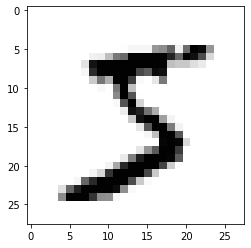

In [5]:
plt.imshow(xTrain[0],cmap="Greys")

In [6]:
for x in xTrain[0]:
    for i in x:
        sys.stdout.write("%d\t" % i) # stdout: module, write:함수
    sys.stdout.write("\n") #sys.stdout: 모니터로 출력해라

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [39]:
xTrain = xTrain.reshape(xTrain.shape[0],784) #(60000,784)로 reshape
xTrain = xTrain.astype('float64')
xtrain = xTrain/255
xTest = xTest.reshape(xTest.shape[0],784)
yTrain = np_utils.to_categorical(yTrain,10) #<-category10개로 
yTest = np_utils.to_categorical(yTest,10)

In [40]:
xTrain = xTrain.astype('float64')
xtrain = xTrain/255
xTest = xTest.reshape(xTest.shape[0],784)
yTrain = np_utils.to_categorical(yTrain,10) #<-category10개로 
yTest = np_utils.to_categorical(yTest,10)

In [41]:
xtrain = xTrain/255
xTest = xTest.reshape(xTest.shape[0],784)
yTrain = np_utils.to_categorical(yTrain,10) #<-category10개로 
yTest = np_utils.to_categorical(yTest,10)

In [42]:
xTest = xTest.reshape(xTest.shape[0],784)
yTrain = np_utils.to_categorical(yTrain,10) #<-category10개로 
yTest = np_utils.to_categorical(yTest,10)

In [11]:
print(yTrain[0])

5


In [43]:
yTrain = np_utils.to_categorical(yTrain,10) #<-category10개로 
yTest = np_utils.to_categorical(yTest,10)

In [42]:
#모델 구성
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import os #numpy랑 tensorflow도

In [15]:
model=Sequential()
model.add(Dense(512,input_dim=784, activation = 'relu')) 
model.add(Dense(10,activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
#모델 환경설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
#모델 최적화
modelDir='./myModel/'
if not os.path.exists(modelDir): #<-만약 mymodel디렉토리가 존재하지 않는다면
    modelPath='./myModel/{epoch:02d}={val_loss:.4f}.hdf5'
    os.mkdir(modelDir) #<-디렉토리 만드는  명령어
    #save_best_only:모델에 최고 정확도만 저장하겠냐
checkpointer = ModelCheckpoint(filepath=modelPath,
                    monitor='val_loss',
                    verbose=1,save_best_only=True)    
#ModelCheckpoint: callback 함수(어떤 상황이오면 시스템이 호출하는 함수),
            #ex: wifi지역에 가면 자동으로 뜨는 메세지=>폰 시스템에서 상황에 오면 그 상황을 설명
            #하는 메세가 뜨도록 나옴
            #model을 학습 할 때마다 중간중간에 호출을 함
es=EarlyStopping(monitor='val_loss',patience = 10)


In [22]:
#모델 생성
model.fit(xTrain,yTrain,validation_data=(xTest,yTest),
          epochs=30,batch_size=200,
         callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.8466 - accuracy: 0.9549 - val_loss: 0.8261 - val_accuracy: 0.9552

Epoch 00001: val_loss improved from inf to 0.82607, saving model to ./myModel/01=0.8261.hdf5
Epoch 2/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.3967 - accuracy: 0.9700 - val_loss: 0.6450 - val_accuracy: 0.9639

Epoch 00002: val_loss improved from 0.82607 to 0.64496, saving model to ./myModel/02=0.6450.hdf5
Epoch 3/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.2559 - accuracy: 0.9760 - val_loss: 0.7191 - val_accuracy: 0.9568

Epoch 00003: val_loss did not improve from 0.64496
Epoch 4/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.1948 - accuracy: 0.9807 - val_loss: 0.6496 - val_accuracy: 0.9647

Epoch 00004: val_loss did not improve from 0.64496
Epoch 5/30
60000/60000 [==============================] - 3s 52us/

In [23]:
print("테스트 정확도 : %.4f" %(model.evaluate(xTest,yTest)[1]))

10000/10000 [==============================] - 0s 17us/step
테스트 정확도 : 0.9694


In [24]:
history = model.fit(xTrain,yTrain,validation_data=(xTest,yTest),
          epochs=30,batch_size=200,
         callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.1237 - accuracy: 0.9886 - val_loss: 0.6621 - val_accuracy: 0.9697

Epoch 00001: val_loss did not improve from 0.53219
Epoch 2/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1309 - accuracy: 0.9872 - val_loss: 0.6976 - val_accuracy: 0.9680

Epoch 00002: val_loss did not improve from 0.53219
Epoch 3/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1381 - accuracy: 0.9879 - val_loss: 0.6033 - val_accuracy: 0.9730

Epoch 00003: val_loss did not improve from 0.53219
Epoch 4/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1308 - accuracy: 0.9888 - val_loss: 0.7439 - val_accuracy: 0.9686

Epoch 00004: val_loss did not improve from 0.53219
Epoch 5/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1601 - accuracy: 0.9875 - val_loss: 0.7715 - val_accuracy: 0.9707

Epoch 

In [28]:
#테스트 셋의 오차
yVloss = history.history['val_loss']
#학습 셋의 오차
yLoss = history.history['loss']

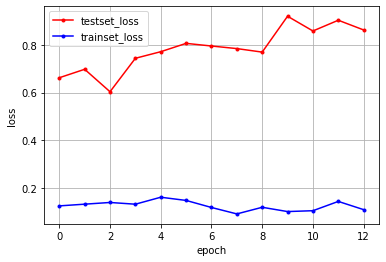

In [31]:
xlen = np.arange(len(yLoss))
plt.plot(xlen,yVloss,marker='.',c='red',label='testset_loss')
plt.plot(xlen,yLoss,marker='.',c='blue',label='trainset_loss')
plt.legend()
plt.grid() #<-격자
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
*Conv2D: convolution layer를 추가하는 함수

In [38]:
from keras.layers import * #<-여기에 dense dropout maxpooling 등 다있음

In [35]:
#CNN으로 MNIST 모델 만들기
model=Sequential()
model.add(Conv2D(32,
                 kernel_size=(3,3),
                 input_shape=(28,28,1),
                 activation = 'relu')) 
#Conv2D(필터개수,kernel_size:필터의 크기,input_shape(행,렬,색상),활성화함수)
model.add(Conv2D(64,
                 (3,3), #<- 2번째 인수는 이미 kernel_size
                 activation = 'relu')) 
model.add(Dense(10,activation = 'softmax'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) #dropout 비율을 줘야함(025: 25%드랍하겠다.)
model.add(Flatten())
#Flatten(): 1차원으로 변경하는 함수
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [ ]:
*dropout:
    -오버피팅 감소
    -히든계층의 노드 중 일부를 선택하여 학습하는 기법
        x1       node1 (선택x)
        ...  =>  node2 (선택o)  => y    
        x784      ...
                 nodeN (선택x)
        효과 : 학습데이터에 지나치게 치우쳐서 학습하지 않게 함

In [36]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [37]:
#모델 최저고하
modelDir='./myCnnModel/'
if not os.path.exists(modelDir): 
    modelPath='./myCnnModel/{epoch:02d}={val_loss:.4f}.hdf5'
    os.mkdir(modelDir) 
checkpointer = ModelCheckpoint(filepath=modelPath,
                    monitor='val_loss',
                    verbose=1,save_best_only=True)    
es=EarlyStopping(monitor='val_loss',patience = 10)

In [44]:
#데이터 다시 불러오기,처리
(xTrain,yTrain),(xTest,yTest) = mnist.load_data()
xTrain = xTrain.reshape(xTrain.shape[0],28,28,1).astype('float32')/255
xTest = xTest.reshape(xTest.shape[0],28,28,1).astype('float32')/255
yTrain = np_utils.to_categorical(yTrain) #<-category10개로 
yTest = np_utils.to_categorical(yTest)

In [45]:
#모델 최적화
history = model.fit(xTrain,yTrain,validation_data=(xTest,yTest),
          epochs=30,batch_size=200,
         callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 52s 866us/step - loss: 0.8171 - accuracy: 0.7302 - val_loss: 0.1476 - val_accuracy: 0.9564

Epoch 00001: val_loss improved from inf to 0.14755, saving model to ./myCnnModel/01=0.1476.hdf5
Epoch 2/30
60000/60000 [==============================] - 60s 995us/step - loss: 0.2117 - accuracy: 0.9379 - val_loss: 0.0922 - val_accuracy: 0.9712

Epoch 00002: val_loss improved from 0.14755 to 0.09222, saving model to ./myCnnModel/02=0.0922.hdf5
Epoch 3/30
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1563 - accuracy: 0.9544 - val_loss: 0.0692 - val_accuracy: 0.9769

Epoch 00003: val_loss improved from 0.09222 to 0.06917, saving model to ./myCnnModel/03=0.0692.hdf5
Epoch 4/30
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1306 - accuracy: 0.9609 - val_loss: 0.0594 - val_accuracy: 0.9806

Epoch 00004: val_loss improved from 0.06917 to 0.05938, sa

In [ ]:
*설명:
    model.save("파일명.h5")로 저장이 되어 있을 때
    저장한 모델을 다시 불러와서 확인할 경우
    from keras.models import load_model
    load_model("파일명.h5")
    model.summary() <-모델 구조
    분류결과 = model.predict_classes(테스트 데이터)
    

In [ ]:
#예측이 틀린 이미지를 8개 정도 출력
label:9, pred:4 ...  label:4 , pred:4
        => 9이미지 출력   =>1이미지
        
2*4형태로 틀린 예측 결과출력

In [ ]:
----------------------------오후

In [ ]:
#이터레이터,제너레이터
*iterator:값을 차례대로 꺼낼 수 있는 객체
    ex: for i in range(100):# <-의미:0~99까지의 숫자를 꺼내 쓸 수 있는 iterator 객체를 만듬
            print(i) 
        -iterable(반복가능객체,문자열,딕셔너리,리스트,셋):
            객체가 iter메서드를 포함 여부: 객체가 반복 가능한지? 확인함

In [3]:
dir([1,2,3,4]) # __iter__가 있기 때문에 꺼내쓸 수 있음

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [7]:
it = [1,2,3].__iter__()
it.__next__()

1

In [8]:
'hello'.__iter__()

In [ ]:
for i in range(3):
    print(i)
1.range에서 __iter__로 이터레이터 객체 생성
2. 반복할 떄 마다 이터레이터에서 __next__
를 호추래서 숫자를 꺼내어 i로 저장

In [ ]:
#내가 만든 클래스에 __iter__,__next__를 구현하면
#이터레이터 생성 가능

In [15]:
class MyCounter:
    def __init__(self,stop):
        self.current=0
        self.stop=stop
    def __iter__(self):
        return self
    def __next__(self):
        if self.current<self.stop:
            r = self.current
            self.current+=1
            return r
        else:
            raise StopIteration #<-멈추게 만듬
        
for i in MyCounter(5):   #이상태로 시작하면 무한루프에 빠짐 계속 실행함 
    print(i)

0
1
2
3
4


In [16]:
a,b,c = MyCounter(3)
print(a,b,c)

0 1 2


In [18]:
a,b,c = map(int,input().split())

1 3 5


In [22]:
class MyCounter:
    def __getitem__(self,index):
        if index<self.stop:
            return index*6
        else:
            raise StopIteration
    def __init__(self,stop):
        self.current=0
        self.stop=stop    

In [23]:
for i in MyCounter(3):
    print(i)

0
6
12


In [29]:
import random
it = iter(lambda:random.randint(0,5),2)
next(it)
next(it)
next(it)
next(it)
next(it)

StopIteration: 

In [ ]:
*제너레이터: 이터레이터를 생성하는 함수
    함수 내부에 yield 키워드를 주면 이터레이터가 생성

In [30]:
def myGen():
    yield 0
    yield 2
    yield 3

In [31]:
for i in myGen():
    print(i)

0
2
3


In [32]:
mg=myGen()
dir(mg)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [ ]:
1. 이미지 제너레이터 클래스 객체 생성
2. flow_from_directory() 호출 -> 제너레이터 형성(keras.io에서 검색)

In [33]:
from keras.preprocessing.image import ImageDataGenerator

In [62]:
trainDataGen = ImageDataGenerator(rescale=1./255)
traingenerator = trainDataGen.flow_from_directory('C:/Users/김경한/jupyter notebook data/do/do/train',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode='categorical')

Found 45 images belonging to 3 classes.


In [63]:
testDataGen = ImageDataGenerator(rescale=1./255)
testgenerator = testDataGen.flow_from_directory('C:/Users/김경한/jupyter notebook data/do/do/test',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode='categorical')

Found 15 images belonging to 3 classes.


In [ ]:
#1크기(24,24),채널:3 필터 3*3,필터개수:32, relu
#2필터: 3*3 필터개수:64, relu
#3maxpool 2*2
#4flatten -> Dense(128)

In [64]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu',
                input_shape=(24,24,3)))
#filter:3*3, filter개수:64,relu
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 430,371
Trainable params: 430,371
Non-trainable params: 0
________________________________________________

In [66]:
#모델 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [67]:
#fit_generator():제너레이터로 생성된 데이터
model.fit_generator(
    traingenerator,#훈련데이터 제너레이터
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = testgenerator,
    validation_steps = 5 #<-step size
)

Epoch 1/50
15/15 [==============================] - 0s 19ms/step - loss: 0.8034 - accuracy: 0.6222 - val_loss: 0.6105 - val_accuracy: 0.7333
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2445 - accuracy: 0.9333 - val_loss: 0.5385 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0629 - accuracy: 0.9778 - val_loss: 0.0027 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 11ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4040 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 8.6878e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 5.5827e-04 - accuracy: 1.0000 - val_loss: 7.3670e-04 - val_accuracy: 1.0000
E

In [68]:
scores = model.evaluate_generator(
    testgenerator,
    steps=5
)
print(scores) 

[5.960460498499742e-07, 1.0]


In [69]:
res = model.predict_generator(
    testgenerator,
    steps=5
)
print(res) #각각의 예측결과 15개

[[1.3939210e-05 4.6934150e-03 9.9529266e-01]
 [9.9998534e-01 6.4737542e-08 1.4537334e-05]
 [9.9999964e-01 3.8276232e-07 1.8410072e-08]
 [9.9999034e-01 8.3230107e-06 1.2914020e-06]
 [8.1896746e-07 9.9999917e-01 2.9724225e-08]
 [5.2866137e-05 1.1376270e-04 9.9983335e-01]
 [2.4611649e-07 9.9999976e-01 1.0252497e-08]
 [6.4846439e-10 9.1836228e-09 1.0000000e+00]
 [1.5526630e-02 9.7521597e-01 9.2574228e-03]
 [1.9388390e-05 9.9998057e-01 1.9599888e-08]
 [1.0000000e+00 2.8777492e-08 4.1318440e-08]
 [5.0435173e-10 1.4281232e-08 1.0000000e+00]
 [2.0673525e-07 9.9999976e-01 3.9264805e-09]
 [1.0242652e-06 5.3878659e-07 9.9999845e-01]
 [1.0000000e+00 3.6763175e-09 4.7719309e-09]]


In [ ]:
*keras.io에서 imagedatagenerator 검색
"""
rotation_range: 회전, 90(0~90도 사이의 랜덤한 각도)
width_shift_range: 이동, 0~1사이의 비율, 0.1(원래이미지 너비의10%만큼 좌/우 이동)
height_shift_range: 이동, 0~1사이의 비율, 0.1(원래이미지 너비의10%만큼 상/하 이동)
shear_range: 변형, 라디안, 0.5(반시계방향으로 0.5의강도로 shift해서 변형)
zoom_range: 축소, 0.3(0.7~1.3 사이의 랜덤크기로 확대, 축소 됨)
horizontal_flip: 수평축으로 뒤집기
vertical_flip: 수직축으로 뒤집기
"""

In [70]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [71]:
augGen = ImageDataGenerator(rescale=1./255,
                  rotation_range=15,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                   shear_range=0.5,
                   zoom_range=[0.8,2.0],
                   horizontal_flip=True,
                   vertical_flip=True,
                   fill_mode='nearest'
                  )

In [76]:
img = load_img('C:/Users/김경한/jupyter notebook data/do/do/train/triangle/triangle001.png')
img

In [77]:
x = img_to_array(img)
x.shape
x = x.reshape((1,)+x.shape) #<- 이미지가 한 개 라는 의미
x.shape

(1, 24, 24, 3)

In [80]:
for batch in augGen.flow(x,
                         batch_size=1,
                         save_to_dir='store',
                         save_prefix='tri',
                         save_format='png'):
    i+=1
    if i>50:
        break

In [79]:
#경로바꾸어주기
trainDataGen = ImageDataGenerator(rescale=1./255)
traingenerator = trainDataGen.flow_from_directory('train',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode='categorical')

testDataGen = ImageDataGenerator(rescale=1./255)
testgenerator = testDataGen.flow_from_directory('test',
                                target_size=(24,24),
                                batch_size=3,
                                class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
